In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores deseados
colors = {'Female': 'pink', 'Male': 'navy'}

In [12]:
# Carga el conjunto de datos con el tipo de datos especificado
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

# Muestra las columnas de todas las tablas
# print("1. multiple_choice_response: ", multiple_choice_responses.columns) 
# print("2. other_text_responses: ", other_text_responses.columns)
# print("3. questions_only: ", questions_only.columns)
# print("4. survey_schema: ", survey_schema)

multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom',
                                       inplace = True)

In [13]:
# Gender Distribution
# Seleccionar la columna Q2 y asignar un nombre de columna adecuado
genders = multiple_choice_responses[['Q2']].drop(multiple_choice_responses.index[0])
genders.columns = ['Gender']

# Filtrar solo Female y Male, y luego agrupar y contar la cantidad de cada uno
gender_distr = genders[(genders['Gender'] == 'Female') | (genders['Gender'] == 'Male')].groupby('Gender').size().reset_index(name='Respondents')


In [14]:
# Gender Distribution
# Calcular el total de encuestados
total_respondents = gender_distr['Respondents'].sum()

# Calcular el porcentaje de encuestados de cada género
gender_distr['Percentage'] = (gender_distr['Respondents'] / total_respondents) * 100
gender_distr['Percentage'] = round(gender_distr['Percentage'], 2)

# Imprimir los resultados
print("Gender Distribution")
gender_distr


Gender Distribution


,Gender,Respondents,Percentage
0,Female,3212,16.6
1,Male,16138,83.4


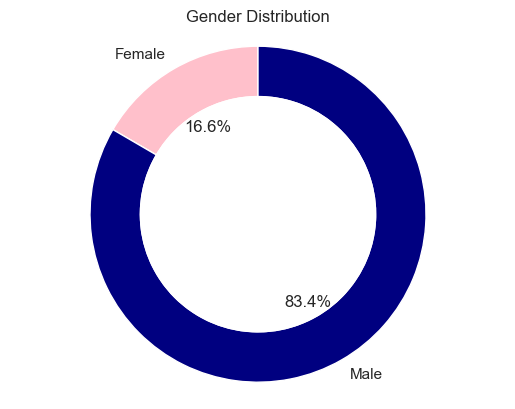

In [19]:
# Gender Distribution
# Crear el grafico de Donuts
labels = gender_distr['Gender']
sizes = gender_distr['Respondents']
colors = ['pink', 'navy']  # Colores para cada género

# Crear el gráfico de dona
fig, ax = plt.subplots()
ax.set_title('Gender Distribution')

# Crear el donut chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Agregar un círculo blanco en el centro para crear el donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustar el aspecto para que sea un círculo
ax.axis('equal')

plt.show()

In [43]:
# Gender Distribution by Country
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

loc = pd.crosstab(demographics['Country'], demographics['Gender'])

# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

In [44]:
# Gender Distribution by Country
# Calcular el total de encuestados por país
loc['Total'] = loc['Female'] + loc['Male']

# Calcular el porcentaje de encuestados de cada género en cada país
loc['Female_Percentage'] = (loc['Female'] / loc['Total']) * 100
loc['Male_Percentage'] = (loc['Male'] / loc['Total']) * 100

# Imprimir los resultados
print("Gender Distribution by Country")
# print(loc[['Female_Percentage', 'Male_Percentage']])

loc[['Female_Percentage', 'Male_Percentage']]

Gender Distribution by Country


Gender,Female_Percentage,Male_Percentage
Country,,
India,16.303658,83.696342
United States of America,20.724012,79.275988
Other,15.884116,84.115884
Canada,22.863741,77.136259
Germany,17.399618,82.600382
United Kingdom,19.361702,80.638298
China,15.189873,84.810127
Brazil,10.941828,89.058172
Russia,12.419355,87.580645


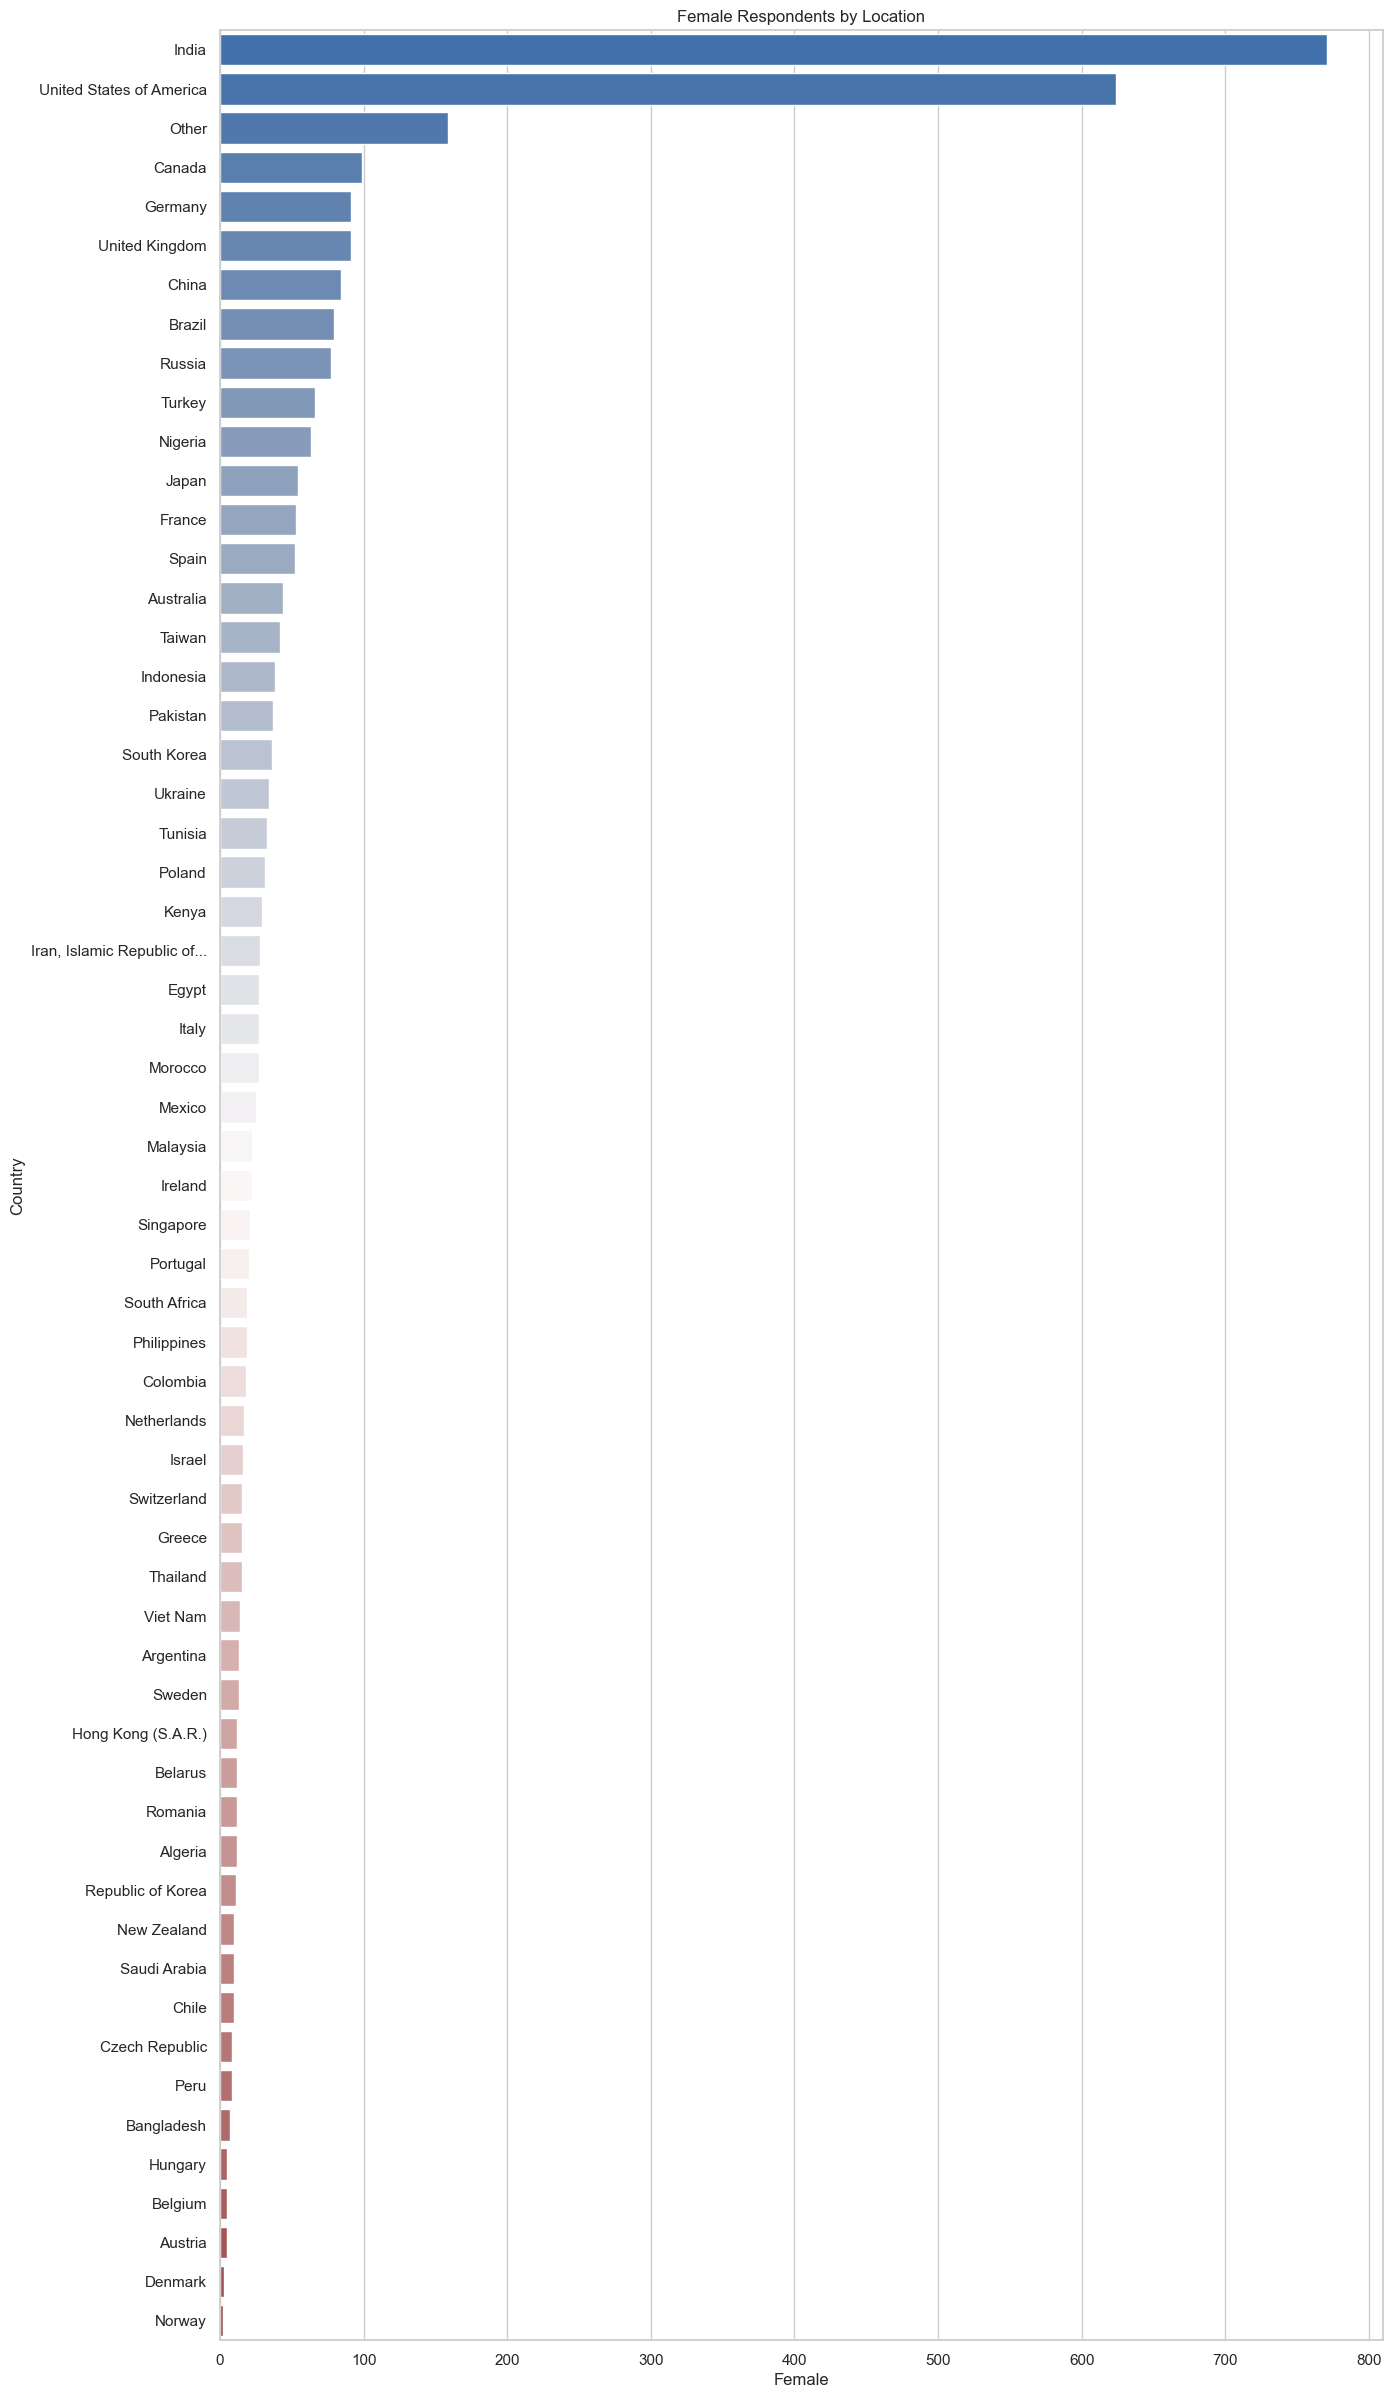

In [45]:
# Gender Distribution by Country - Female Respondents by Location
# Creando el gráfico de barras horizontal
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location')
ax.set(xlabel='Counts')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()

In [46]:
# Female Respondents by Location (Percentage)
# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = female + male
    loc.at[i, 'Female'] = round((female / total) * 100, 2)  # Calculando el porcentaje y redondeando a 2 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Imprimir los resultados
print("Female Respondents by Location (Percentage)")

# print(loc[['Female']])
# loc[['Female']]

Female Respondents by Location (Percentage)


In [47]:
# Dividiendo el DataFrame en dos mitades
half_rows = len(loc) // 2

# Imprimiendo la mitad superior del DataFrame
print("Mitad Superior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[:half_rows]


Mitad Superior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Tunisia,48.53
Philippines,31.67
"Iran, Islamic Republic of...",29.47
Malaysia,29.33
Kenya,25.44
Ireland,25.29
Turkey,23.24
Indonesia,23.03
Canada,22.86


In [48]:
# Imprimiendo la mitad inferior del DataFrame
print("\nMitad Inferior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[half_rows:]


Mitad Inferior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Switzerland,15.96
Other,15.88
Israel,15.38
China,15.19
Republic of Korea,15.07
Poland,14.90
Sweden,14.77
Taiwan,14.38
France,14.06


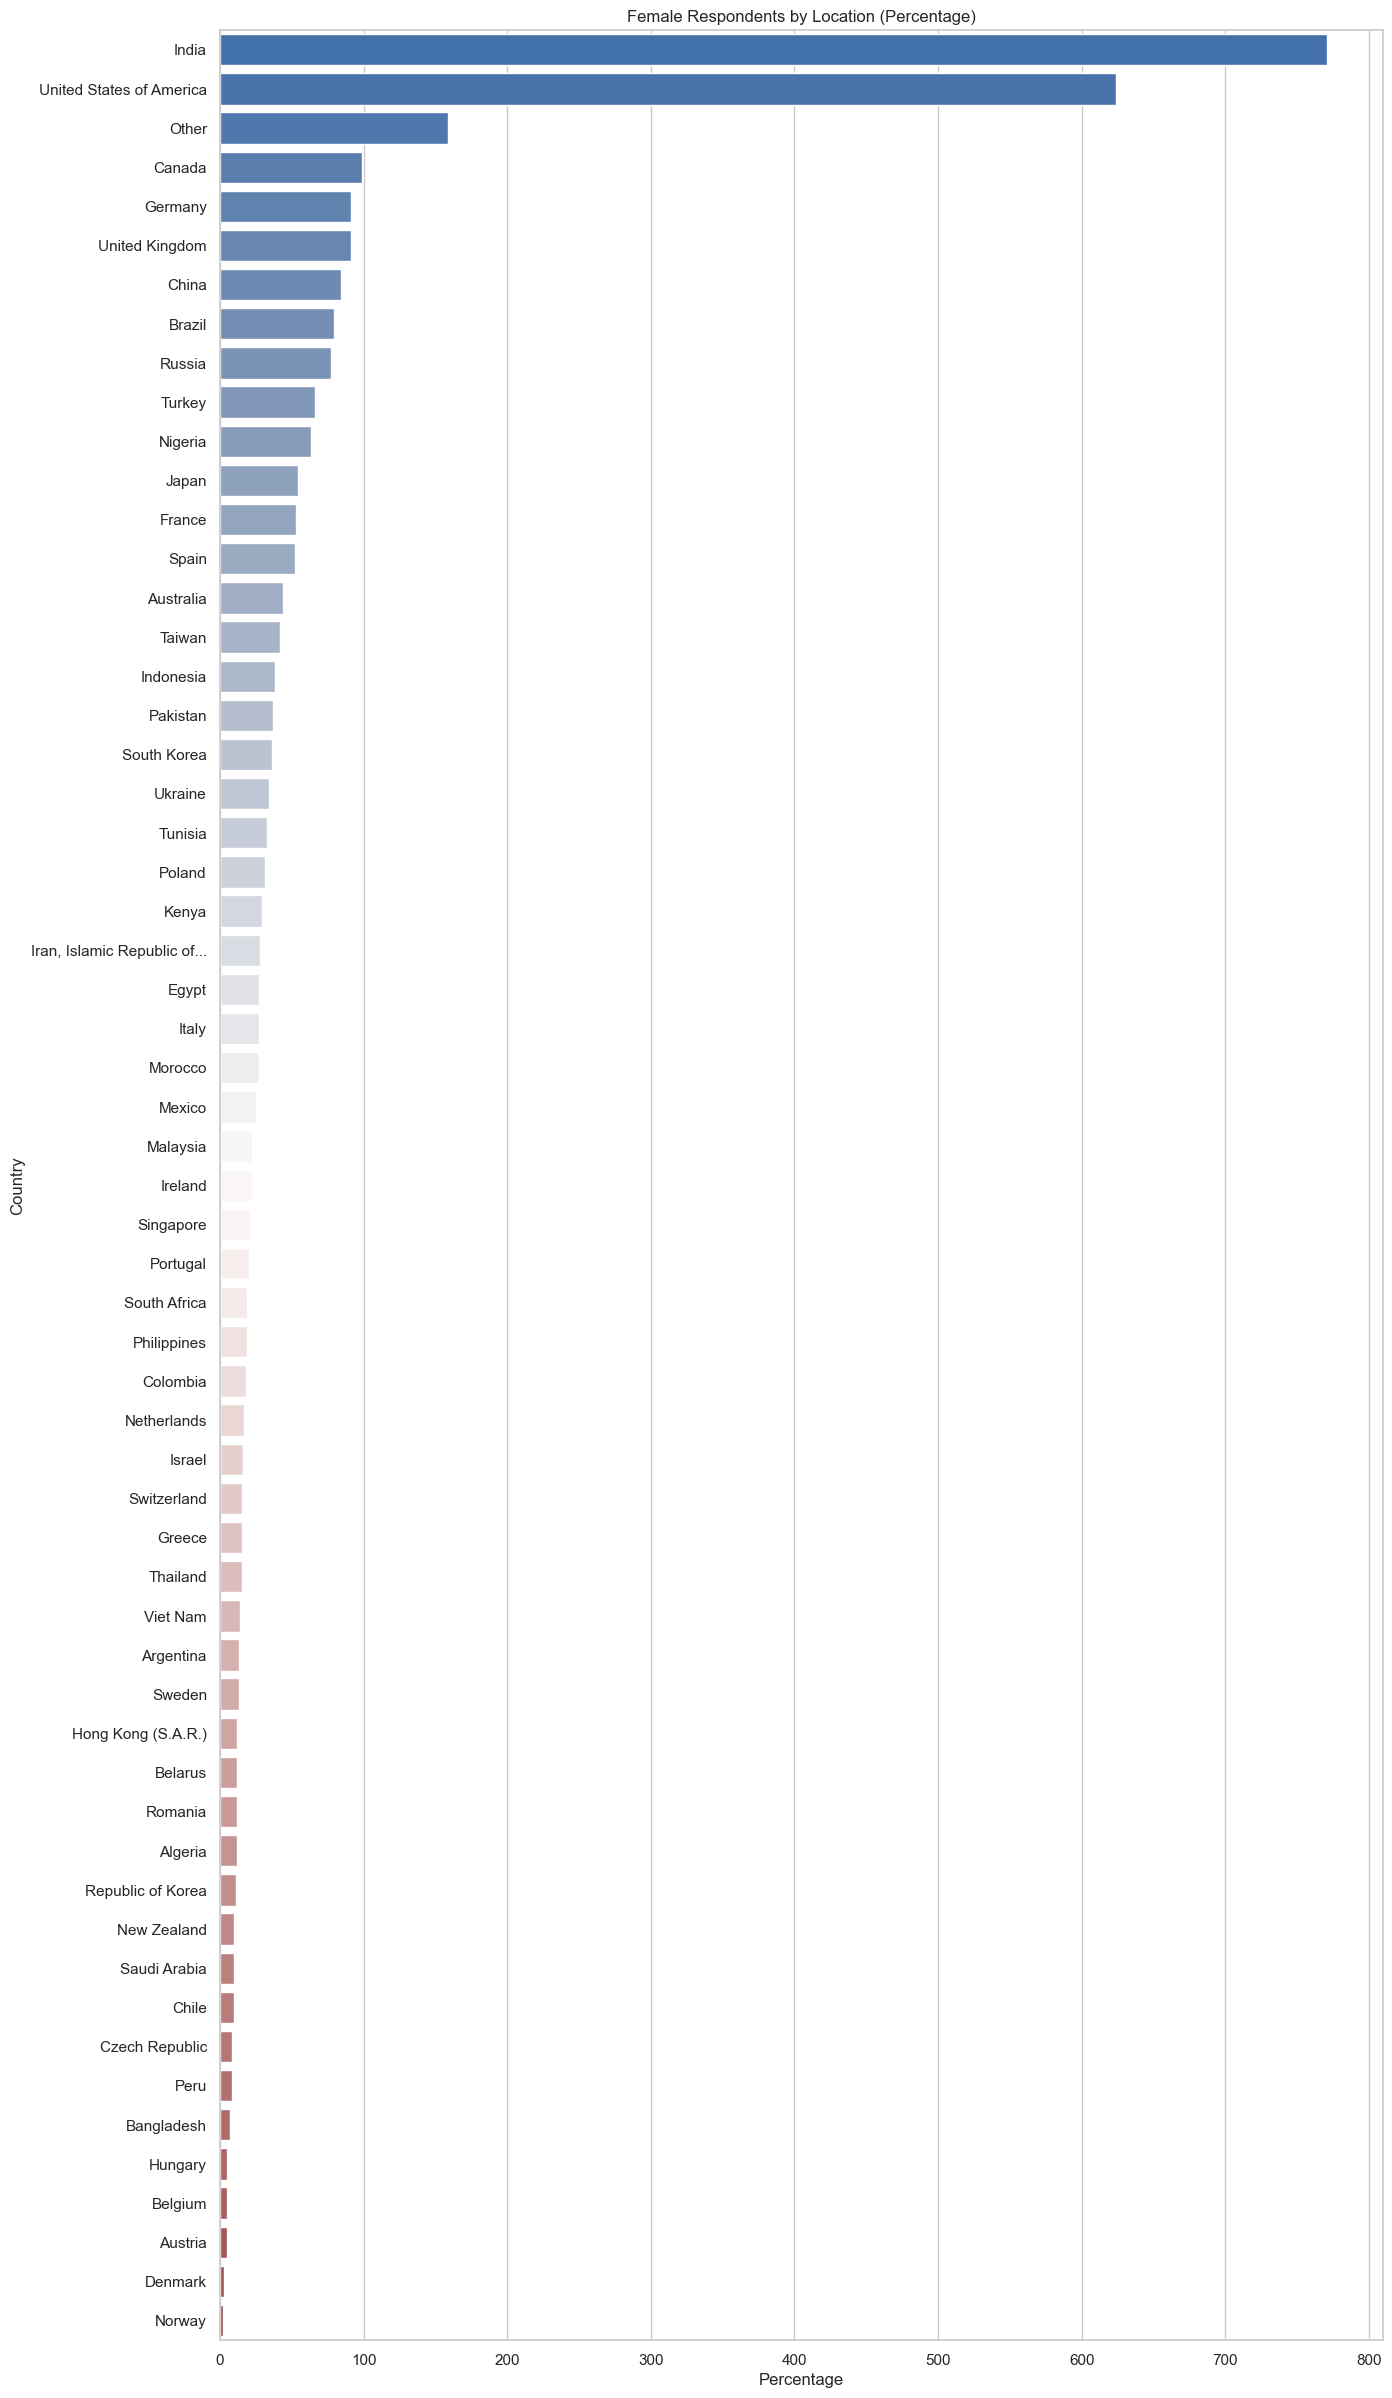

In [27]:
# Female Respondents by Location (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location (Percentage)')
ax.set(xlabel='Percentage')
sns.set(style='whitegrid')
ax = sns.barplot(x=list(loc['Female']), y=loc.index, ax=ax, palette="vlag")
plt.show()

In [49]:
# Gender Distribution by Age Group
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
age = pd.crosstab(demographics['Age_Group'], demographics['Gender'])
age['Female'] = age['Female'].astype(float)
age['Male'] = age['Male'].astype(float)

totals = demographics.groupby('Age_Group').agg({'Gender':'count'})

In [50]:
# Gender Distribution by Age Group - Age Group Distribution
# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame({
    'Age_Group': totals.index,
    'Total_Gender': totals['Gender'],
    'Female_Respondents': age['Female'],
    'Male_Respondents': age['Male']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Total_Gender,Female_Respondents,Male_Respondents
Age_Group,,,,
18-21,18-21,2468,419.0,2049.0
22-24,22-24,3558,678.0,2880.0
25-29,25-29,4372,810.0,3562.0
30-34,30-34,3065,513.0,2552.0
35-39,35-39,2047,304.0,1743.0
40-44,40-44,1410,209.0,1201.0
45-49,45-49,928,118.0,810.0
50-54,50-54,678,80.0,598.0
55-59,55-59,408,51.0,357.0


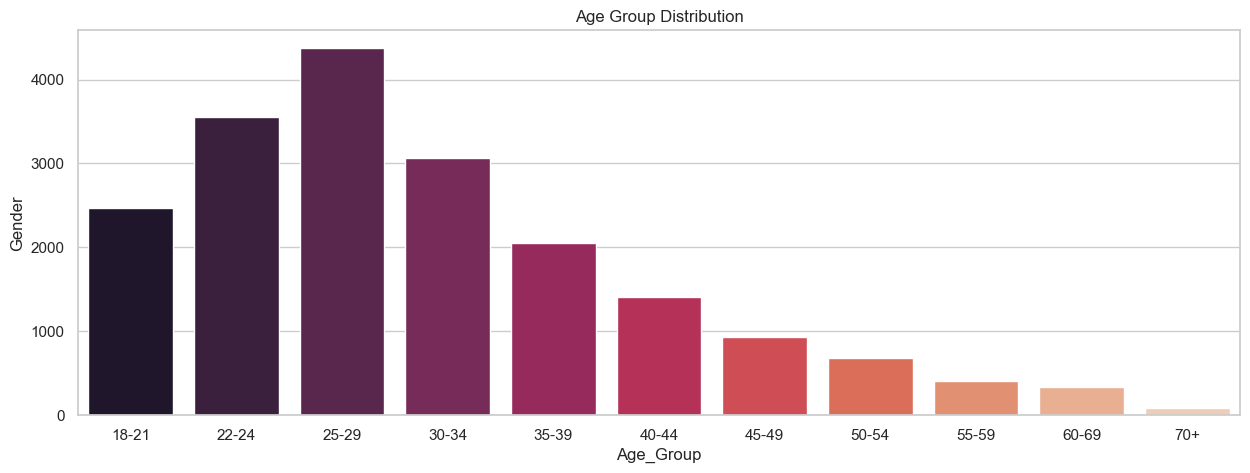

In [51]:
# Gender Distribution by Age Group - Age Group Distribution
# Crear el gráfico de barras horizontal
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Age Group Distribution')
ax.set(xlabel='Age Group', ylabel='Respondents')
sns.set(style='whitegrid')
sns.barplot(x=totals.index, y=totals['Gender'], palette="rocket", ax=ax)
plt.show()

In [ ]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Calcular los porcentajes de mujeres por grupo de edad
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = female + male
    age.at[i, 'Female'] = round((female / total) * 100, 2)  # Convertir a porcentaje y redondear a 2 decimales

# Eliminar la columna 'Male' si deseas incluir solo el porcentaje de mujeres
age = age.drop(['Male'], axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Age_Group': age.index,
    'Female_Percentage': age['Female']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

In [ ]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.set_title('Female Respondents by Age Group (Percentage)')
ax.set(ylabel='Percentage')
sns.set(style='whitegrid')

ax = sns.barplot(x=age.index, y=age['Female'], palette="rocket")

plt.show()

In [ ]:
# Career and Education
# Filtrar los datos solo para mujeres y hombres
women = multiple_choice_responses[multiple_choice_responses['Q2']=='Female'].copy()
men = multiple_choice_responses[multiple_choice_responses['Q2']=='Male'].copy()

# Agrupar por título de trabajo y contar el número de ocurrencias
jobs = women.groupby('Q5', as_index=False).agg({'Q1':'count'})
jobs = jobs.rename(columns={'Q1':'Count', 'Q5':'Job_Title'})
jobs = jobs.sort_values(by=['Count'], ascending = False)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Job_Title': jobs['Job_Title'],
    'Count': jobs['Count']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

In [ ]:
# Career and Education - Job Titles (Women only)
# Crear el gráfico 

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('Job Titles (Women only)')
sns.set(style='whitegrid')
ax = sns.barplot(x='Count', y='Job_Title', palette="deep", data=jobs)

plt.show()

In [ ]:
# Career and Education - Job Fields (Women only)
# Lista de trabajos en STEM y no claros
stem = ['Data Scientist', 'Data Analyst', 'Software Engineer', 'Research Scientist', 
        'Data Engineer', 'DBA/Database Engineer', 'Statistician']
unclear = ['Business Analyst', 'Product/Project Manager']

jobs['Job_Field'] = [ 'STEM' if x in stem else 'Unclear' if x in unclear else x for x in jobs['Job_Title'] ]
field = jobs.groupby('Job_Field', as_index=False).agg({'Count':'sum'})
field = field.sort_values(by=['Count'], ascending=False)
field['Count'] = field['Count'].astype(float)

total = field['Count'].sum()

for i in field.index:
    count = field.at[i, 'Count']
    field.at[i, 'Count'] = round(count / total,4)

field = field.rename(columns={'Count':'Percentage'})

# Crear un DataFrame con los resultados
result_df = pd.DataFrame(field)

# Visualizar los resultados en un DataFrame
print("Resultados del porcentaje de trabajos por campo:")
result_df


In [ ]:
# Career and Education - Job Fields (Women only)
# # Crear el gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Job Fields (Women only)')
sns.set(style='whitegrid')

sns.barplot(x='Percentage', y='Job_Field', data=field)

plt.show()

In [ ]:
# Career and Education - Degrees
education = women.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = education.rename(columns={'Q1':'Count','Q4':'Education'}).sort_values(by=['Count'], ascending = False)
education.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education.replace("No formal education past high school", "High School", inplace = True)
education.replace("I prefer not to answer", "No answer", inplace = True)


postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education['Category'] = [ 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu 
                         else 'Undergrad' if x == "Bachelor’s degree" else x for x in education['Education'] ]

edu_cat = education.groupby('Category', as_index = False).agg({'Count':'sum'})
edu_cat['Count'] = edu_cat['Count'].astype(float)
total = edu_cat['Count'].sum()

for i in edu_cat.index:
    count = edu_cat.at[i, 'Count']
    edu_cat.at[i, 'Count'] = round(count / total,4)
    
edu_cat = edu_cat.rename(columns={'Count':'Percentage'}).sort_values(by=['Percentage'], ascending = False)

# Visualizar los resultados en un DataFrame
print("Resultados de Education")
education

In [ ]:
# Career and Education - Degrees
# # Crear el gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Degrees - Education')
sns.set(style='whitegrid')

# ax = sns.barplot('Count', 'Education', ax=ax, palette="deep", data=education)
sns.barplot(x='Count', y='Education', palette="deep", data=education)

plt.show()


In [ ]:
print("Resultados Degree Categories")
edu_cat


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Degree Categories')
sns.set(style='whitegrid')

# ax = sns.barplot('Percentage', 'Category', ax=ax, palette="deep", data=edu_cat)
sns.barplot(x='Percentage', y='Category', palette="deep", data=edu_cat, ax=ax)

plt.show()

In [ ]:
# Low Salaries: Occupation
low_salary = women[women['Q10']=='$0-999']
lows = low_salary.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows = lows.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows = lows.sort_values(by=['Count'], ascending = False)

print("Low Salaries: Occupation")
lows 

In [ ]:
# Low Salaries: Occupation
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Low Salaries: Occupation')
sns.set(style='whitegrid')


sns.barplot(x='Count', y='Occupation', palette="deep", data=lows)
plt.show()

In [ ]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

salaries = women.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries = salaries.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries['Range_Start'] = salaries.Range.apply(lambda x: find_number(x))

salaries = salaries.sort_values(by=['Range_Start'])
salaries = salaries[salaries['Range_Start'] != 0]

print("Low Salaries: Range")
salaries

In [ ]:
# Low Salaries: Range
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', data=salaries)
ax.set_xticklabels(labels=salaries['Range'], rotation=30)
plt.show()


In [ ]:
# Salaries - No Degree
women['Q4'].replace("No formal education past high school", "High School", inplace = True)
women['Q4'].replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
no_degree = women[(women['Q4']=='High School') | (women['Q4']=='Some college')]

no_degree_sal = no_degree.groupby('Q10', as_index=False).agg({'Q1':'count'})
no_degree_sal = no_degree_sal.rename(columns={'Q10':'Range', 'Q1':'Count'})

no_degree_sal['Range_Start'] = no_degree_sal.Range.apply(lambda x: find_number(x))

no_degree_sal = no_degree_sal.sort_values(by=['Range_Start'])

print("Salaries - No Degree")
no_degree_sal

In [ ]:
# Salaries - No Degree
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', palette="deep", data=no_degree_sal, ax=ax)
ax.set_xticklabels(labels=no_degree_sal['Range'], rotation=30)
plt.show()

In [ ]:
# Salaries - No Degree

no_degree_job = no_degree.groupby('Q5', as_index=False).agg({'Q1':'count'})
no_degree_job = no_degree_job.rename(columns={'Q5':'Education', 'Q1':'Count'})
no_degree_job = no_degree_job.sort_values(by=['Count'], ascending=False)

print("Job Title - No Degree")
no_degree_job


In [ ]:
# Salaries - No Degree
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Job Title - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Education', palette="deep", data=no_degree_job)
plt.show()

In [ ]:
women['Q15'].replace('I have never written code', 'None', inplace=True)
women['Q15'].replace(np.nan, 'No answer', inplace = True)

code = women.groupby('Q15', as_index = False).agg({'Q1':'count'})
code = code.rename(columns={'Q1':'Count', 'Q15':'Coding Experience'})
code = code.sort_values(by=['Count'], ascending = False)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Experience')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Coding Experience', ax=ax, palette="deep", data=code)
plt.show()

In [ ]:
beginner = ['< 1 years', '1-2 years']
mid = ['3-5 years', '5-10 years']
expert = ['10-20 years', '20+ years']

code['Level'] = [ 'Beginner' if x in beginner else 'Intermediate' if x in mid 
                 else 'Expert' if x in expert else x for x in code['Coding Experience']]

code_lvl = code.groupby('Level').agg({'Count':'sum'})
order = ['None','Beginner','Intermediate','Expert','No answer']
code_lvl = code_lvl.reindex(order).reset_index()

total = code_lvl['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Level - Women')
sns.set(style='whitegrid')
sns.barplot(x='Level', y='Count', ax=ax, palette="deep", data=code_lvl, estimator=lambda x: sum(x)/total*100.0)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
exploring = "We are exploring ML methods (and may one day put a model into production)"
no = "No (we do not use ML methods)"
women['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in women['Q8']]
men['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in men['Q8']]

ml = women.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml_m = men.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml = ml.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})
ml_m = ml_m.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})

total = ml['Count'].sum()
total_m = ml_m['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.set(style='whitegrid')
sns.barplot(x='Machine_Learning', y='Count', ax=ax[0], palette="deep", data=ml, estimator=lambda x: sum(x)/total*100.0)
sns.barplot(x='Machine_Learning', y='Count', ax=ax[1], palette="deep", data=ml_m, estimator=lambda x: sum(x)/total_m*100.0)
for a in ax:
    a.set(xlabel='Machine Learning', ylabel='Percentage')
ax[0].set_title('ML Usage - Women')
ax[1].set_title('ML Usage - Men')
plt.show()


In [ ]:
responses = women['Q1'].count()
responses_m = men['Q1'].count()
base = 'Q18_Part_'
counts = dict()
counts_m = dict()

palette = dict()
colours = sns.color_palette('deep',11)

for i in range(1, 12):
    col = base + str(i)
    count = women[col].count()
    count_m = men[col].count()
    lang_series = women[col].dropna()
    lang = lang_series.values[0] if len(lang_series) > 0 else None
    if lang:
        counts[lang] = count
        counts_m[lang] = count_m
        palette[lang] = colours[i - 1]
        
result = pd.DataFrame.from_dict(counts, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result = result.sort_values(by=['Count'], ascending = False)
result_m = pd.DataFrame.from_dict(counts_m, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result_m = result_m.sort_values(by=['Count'], ascending = False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Language', ax=ax[0], palette=palette, data=result, 
            estimator=lambda x: sum(x) / responses * 100.0)
sns.barplot(x='Count', y='Language', ax=ax[1], palette=palette, data=result_m, 
            estimator=lambda x: sum(x) / responses_m * 100.0)

for a in ax:
    a.set(ylabel='', xlabel='Percentage')
ax[0].set_title('Languages - Women')
ax[1].set_title('Languages - Men')
plt.show()

In [ ]:
python = women[women['Q18_Part_1']=='Python'].copy()

python['Q15'] = [ 'New' if x == '< 1 years' else 'Beginner' if x == '1-2 years' else 'Proficient' for x in python['Q15']]
py_exp = python.groupby('Q15').agg({'Q1':'count'})

py_order = ['New', 'Beginner', 'Proficient']
py_exp = py_exp.reindex(py_order).reset_index()
py_exp = py_exp.rename(columns={'Q15':'Experience', 'Q1':'Count'})

total_py = py_exp['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Female Python Users')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_exp, 
            estimator=lambda x: sum(x) / total_py * 100.0)
ax.set(ylabel='Percentage')
plt.show()

In [ ]:
for i in python.index:
    count = 0
    for j in range(2,11):
        lang = python.at[i, (base + str(j))]
        if pd.isnull(lang) == False:
            count += 1
    python.at[i, 'Q18_Count'] = count
    
python['Multi_Language'] = [ '> 5' if x >= 5.0 else '2-4' if x > 2.0 
                            else 0 if x == 0.0 else 1 if x == 1.0 else 2 for x in python['Q18_Count']]
others = python.groupby(['Multi_Language', 'Q15']).agg({'Q1':'count'}).rename(columns={'Q1':'Count'})
others = pd.DataFrame(data={'Count': others['Count']}, index=others.index).reset_index()

py_only = others[others['Multi_Language']==0].drop(['Multi_Language'],axis=1).rename(columns={'Q15':'Experience'})
total_py_only = py_only['Count'].sum()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Python only (Female)')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_only, 
            estimator=lambda x: sum(x) / total_py_only * 100.0, order=py_order)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
import warnings

# Desactivar las advertencias relacionadas con el ajuste del diseño de la figura
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

cat_order = ['New', 'Beginner', 'Proficient']

sns.set(style='whitegrid')
g = sns.catplot(x='Multi_Language', y='Count', col='Q15', data=others, kind='bar', col_order=cat_order)
titles = ["New", "Beginner", "Proficient"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set(xlabel='Languages in Addition to Python')

plt.show()


In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 